# Data Analysis - Car Price Prediction

# Data Wrangling

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(url, names=headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Handle missing values

In [242]:
import numpy as np

In [243]:
df.replace('?', np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Let's first convert to the right data type the columns with missings values in order to fulfil the missing values with means. For the objet type column we will replace it with the most frequenty value.

Replace by mean:

- "normalized-losses": 41 missing data, replace them with mean
- "stroke": 4 missing data, replace them with mean
- "bore": 4 missing data, replace them with mean
- "horsepower": 2 missing data, replace them with mean
- "peak-rpm": 2 missing data, replace them with mean


Replace by frequency:

- "num-of-doors": 2 missing data, replace them with "four".
Reason: 84% sedans are four doors. Since four doors is most frequent, it is most likely to occur


Drop the whole row:



- "price": 4 missing data, simply delete the whole row.
Reason: You want to predict price. You cannot use any data entry without price data for prediction; therefore any row now without price data is not useful to you.

In [245]:
df['normalized-losses'] = df['normalized-losses'].astype('float')
avg = df['normalized-losses'].mean()
df['normalized-losses'].replace(np.nan,avg, inplace= True)

df['stroke'] = df['stroke'].astype('float')
avg = df['stroke'].mean()
df['stroke'].replace({np.nan: avg}, inplace = True)

df['bore'] = df['bore'].astype('float')
avg = df['bore'].mean()
df['bore'].replace({np.nan: avg}, inplace=True)

df['horsepower'] = df['horsepower'].astype('float')
avg = df['horsepower'].mean()
df['horsepower'].replace({np.nan: avg}, inplace=True)

df['peak-rpm'] = df['peak-rpm'].astype('float')
avg = df['peak-rpm'].mean()
df['peak-rpm'].replace({np.nan: avg}, inplace=True)

df['num-of-doors'].replace({np.nan:'two'},inplace=True)

df['price'] = df['price'].astype('float')

df.dropna(subset= ['price'],axis=0,  inplace= True)

df.reset_index(drop=True, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

C:\Users\Arkon\AppData\Local\Temp\ipykernel_17540\962024302.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].replace(np.nan,avg, inplace= True)
C:\Users\Arkon\AppData\Local\Temp\ipykernel_17540\962024302.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


## Data Standardization

Let's change the columns with mpg to L/100km.


Use this formula for unit conversion:

L/100km = 235 / mpg

In [246]:
df['city-L/100km'] = 235/df['city-mpg'] 

df['highway-L/100km'] = 235/df['highway-mpg']

In [247]:

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818


## Data Normalization

**Why normalization?**

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include

1. scaling the variable so the variable average is 0
2. scaling the variable so the variance is 1
3. scaling the variable so the variable values range from 0 to 1

In [248]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width'] / df['width'].max()
df['height'] = df['height'] / df['height'].max()

## Binning

Text(0.5, 1.0, 'Horsepower Histogram')

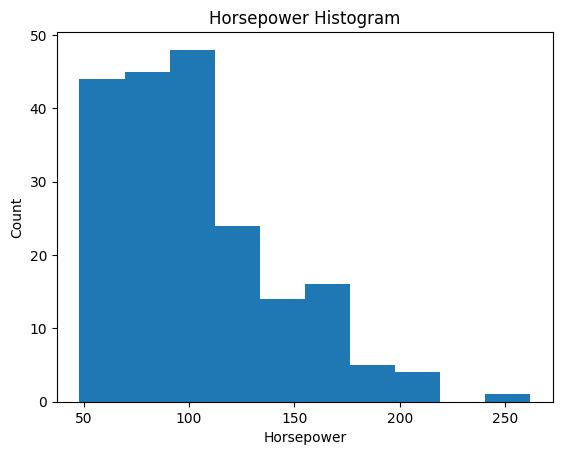

In [249]:
import matplotlib.pyplot as plt

plt.hist(df['horsepower'])
plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.title('Horsepower Histogram')

In [250]:
bin_size = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 4)

bin_names = ['low','medium', 'high']

df['horsepower-binned'] = pd.cut(df['horsepower'], bin_size, labels= bin_names, include_lowest= True)

print(df[['horsepower', 'horsepower-binned']].head())
print(df['horsepower-binned'].value_counts())

   horsepower horsepower-binned
0       111.0               low
1       111.0               low
2       154.0            medium
3       102.0               low
4       115.0               low
horsepower-binned
low       153
medium     43
high        5
Name: count, dtype: int64


(array([153.,  43.,   5.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

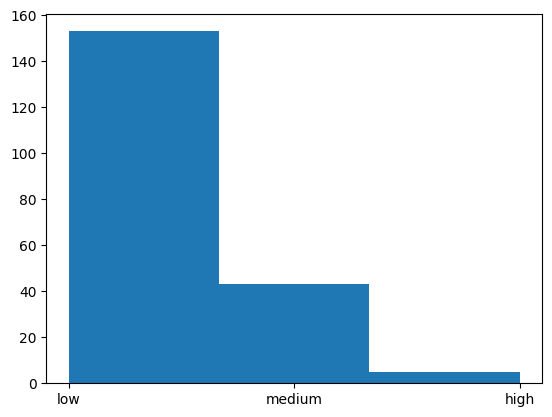

In [251]:
plt.hist(df['horsepower-binned'], bins=3)

## Dummies


In [252]:
dummy_gas = pd.get_dummies(df['fuel-type'])
dummy_gas.rename({'diesel':'fuel-type-diesel','gas':'fuel-type-gas'}, axis= 1, inplace=True)
dummy_gas.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [253]:
dummy_aspiration = pd.get_dummies(df['aspiration'])
dummy_aspiration.rename({'std':'aspiration-std','turbo':'aspiration-turbo'},axis=1, inplace=True)
dummy_aspiration.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [254]:
df.drop(['aspiration','fuel-type'],axis=1,inplace=True)
df = pd.concat([df,dummy_gas,dummy_aspiration], axis=1)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,low,False,True,True,False
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,low,False,True,True,False
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,medium,False,True,True,False
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,low,False,True,True,False
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,low,False,True,True,False


# Exploratory Data Analysis

For do a correlation analysis, first we need to only have numeric parameters.

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   normalized-losses  201 non-null    float64 
 2   make               201 non-null    object  
 3   num-of-doors       201 non-null    object  
 4   body-style         201 non-null    object  
 5   drive-wheels       201 non-null    object  
 6   engine-location    201 non-null    object  
 7   wheel-base         201 non-null    float64 
 8   length             201 non-null    float64 
 9   width              201 non-null    float64 
 10  height             201 non-null    float64 
 11  curb-weight        201 non-null    int64   
 12  engine-type        201 non-null    object  
 13  num-of-cylinders   201 non-null    object  
 14  engine-size        201 non-null    int64   
 15  fuel-system        201 non-null    object  
 16  bore    

In [256]:
df[['wheel-base','bore','stroke','compression-ratio', 'horsepower','engine-size','highway-mpg','peak-rpm', 'price']].corr()

,wheel-base,bore,stroke,compression-ratio,horsepower,engine-size,highway-mpg,peak-rpm,price
wheel-base,1.000000,0.493244,0.158018,0.250313,0.371147,0.572027,-0.543304,-0.360305,0.584642
bore,0.493244,1.000000,-0.055390,0.001263,0.566936,0.572609,-0.591309,-0.267392,0.543155
stroke,0.158018,-0.055390,1.000000,0.187871,0.098267,0.205928,-0.034636,-0.063561,0.082269
compression-ratio,0.250313,0.001263,0.187871,1.000000,-0.214514,0.028889,0.268465,-0.435780,0.071107
horsepower,0.371147,0.566936,0.098267,-0.214514,1.000000,0.822676,-0.804575,0.107885,0.809575
engine-size,0.572027,0.572609,0.205928,0.028889,0.822676,1.000000,-0.679571,-0.256733,0.872335
highway-mpg,-0.543304,-0.591309,-0.034636,0.268465,-0.804575,-0.679571,1.000000,-0.058598,-0.704692
peak-rpm,-0.360305,-0.267392,-0.063561,-0.435780,0.107885,-0.256733,-0.058598,1.000000,-0.101616
price,0.584642,0.543155,0.082269,0.071107,0.809575,0.872335,-0.704692,-0.101616,1.000000


We can see that the highest correation values from price are with horsepower, engine-size and highway-mpg

<Axes: xlabel='highway-mpg', ylabel='price'>

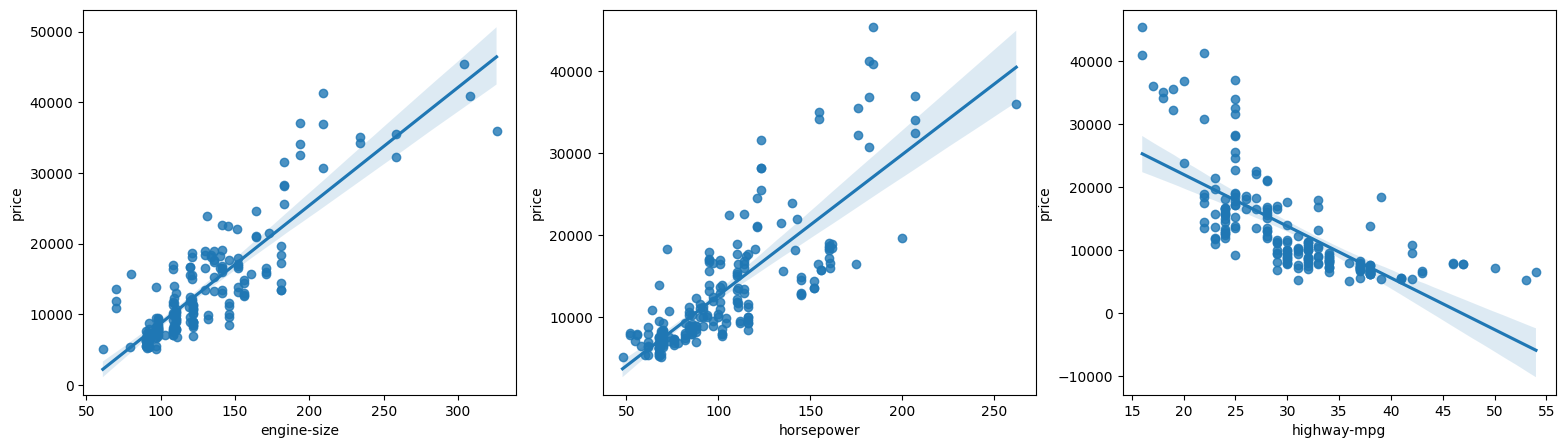

In [257]:
fig,axes = plt.subplots(1,3, figsize = (19,5))

sns.regplot(x = df['engine-size'], y = df['price'], ax= axes[0])
sns.regplot(x = df['horsepower'], y = df['price'], ax= axes[1])
sns.regplot(x = df['highway-mpg'], y = df['price'], ax = axes[2])

For the categorical variables we can use boxplots

In [258]:
df.describe(include='object')

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,113,94,118,198,145,157,92


<Axes: xlabel='engine-type', ylabel='price'>

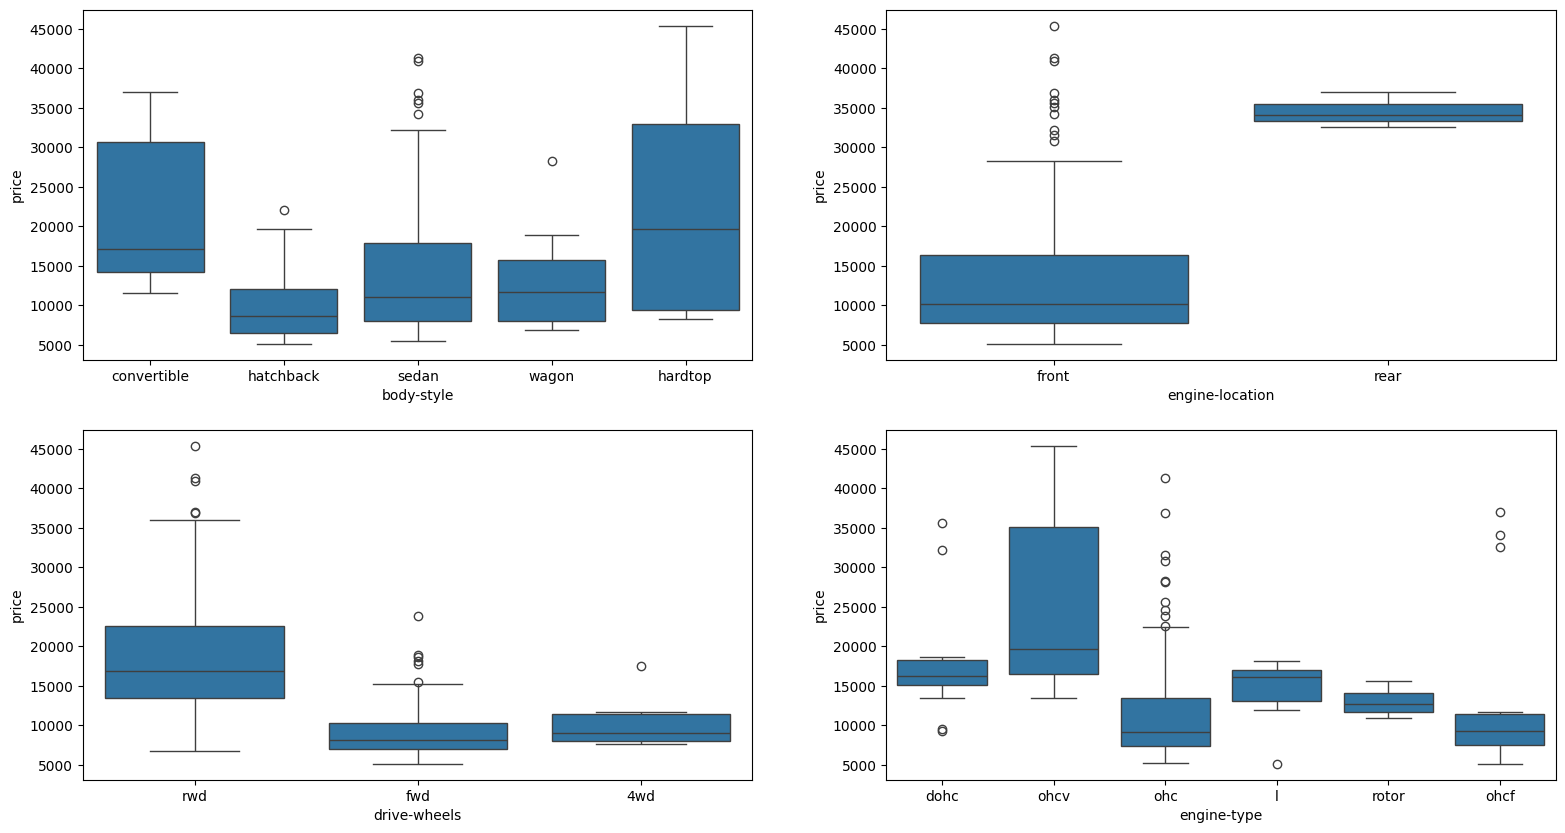

In [259]:
fig, axes = plt.subplots(2,2, figsize = (19,10))
sns.boxplot(x= df['body-style'], y = df['price'], ax = axes[0,0])
sns.boxplot(x= df['engine-location'], y = df['price'], ax = axes[0,1])
sns.boxplot(x= df['drive-wheels'], y = df['price'], ax = axes[1,0])
sns.boxplot(x= df['engine-type'], y = df['price'], ax = axes[1,1])

In [260]:
df_groupby = df.groupby(['body-style','drive-wheels'], as_index= False).agg(
    {
    'price':'mean'
    }
)
df_groupby

,body-style,drive-wheels,price
0,convertible,fwd,11595.000000
1,convertible,rwd,23949.600000
2,hardtop,fwd,8249.000000
3,hardtop,rwd,24202.714286
4,hatchback,4wd,7603.000000
5,hatchback,fwd,8396.387755
6,hatchback,rwd,14337.777778
7,sedan,4wd,12647.333333
8,sedan,fwd,9811.800000
9,sedan,rwd,21711.833333


In [261]:
groupby_pivot = df_groupby.pivot(index='drive-wheels', columns='body-style')
groupby_pivot.fillna(0, inplace=True)
groupby_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

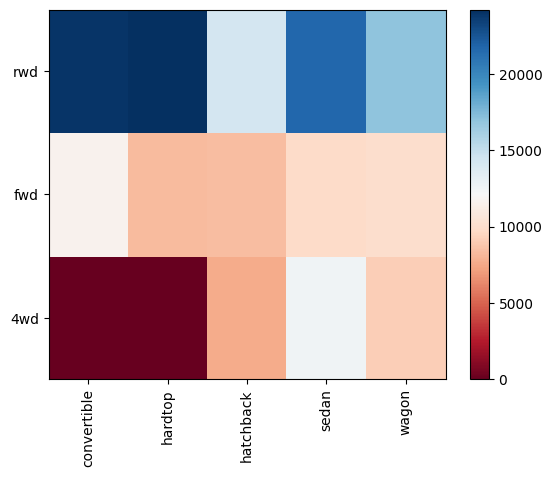

In [262]:
fig, ax = plt.subplots()
im = ax.pcolor(groupby_pivot, cmap='RdBu')

#label names
row_labels = groupby_pivot.columns.levels[1]
col_labels = groupby_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(groupby_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(groupby_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Correlation and Causation

## P-Value

In [263]:
from scipy import stats

In the previous correlation analysis there was a correlation value of 0.584642 by 'Wheel-base'. Let's see if it has a significance P-Value

In [264]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print(f'Pearsons Correlation Coeficient: {pearson_coef}\nP-value: {p_value}')

Pearsons Correlation Coeficient: 0.5846418222655081
P-value: 8.076488270732847e-20


We can see that the P-Value is < 0.001, that means that there is a strong statistical correlation between 'Wheel-base' and 'price' eventhough the linear relationship isn't so strong (~0.585)

## Chi square test

For making an analysis of if 'Drive-wheels' are singnificant or not we first need to convert price into a categorical variable in order to excute the corresponding Chi square test

**Hipotesis**
- Ho: There are no association between the categorical variables
- H1: There are an association between the categorical variables

In [265]:
from scipy.stats import chi2_contingency

In [266]:
bin_size = np.linspace(df['price'].min(), df['price'].max(),5)
bin_labels = ['Low','Meidum-low', 'Medium-high', 'High']

df['price_binned'] = pd.cut(df['price'], bin_size, labels= bin_labels, include_lowest= True)

In [267]:
contingency_table = pd.crosstab(df['drive-wheels'], df['price'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square: {chi2}\nP-Value: {p_value}')

Chi-square: 386.39411016949157
P-Value: 0.26815491347065173


We do not reject the null hipotesis. There are no a statistical significant association betweeen the categorical variables

# Linear Regression

## Simple Linear Regression

In [268]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

First we create the linear regression object

In [269]:
lm = LinearRegression()
lm

LinearRegression()

For this example we use 'Highway-mpg'.

We train the model as follows

In [270]:
X = df[['highway-mpg']]
y = df['price']

lm.fit(X,y)

LinearRegression()

Then we predict the values from the same data as the training

In [271]:
yhat = lm.predict(X)

In [272]:
print(f'yhat = {lm.intercept_:.3f} + {lm.coef_[0]:.3f}X')
print(r2_score(y,yhat))

yhat = 38423.306 + -821.733X
0.4965911884339176


Let´s do the same with 'engine-size'

In [273]:
lm_1 = LinearRegression()

X = df[['engine-size']]
y = df['price']

lm_1.fit(X,y)

yhat = lm_1.predict(X)

print(f'yhat = {lm_1.intercept_:.3f} + {lm_1.coef_[0]:.3f}X')
print(r2_score(y,yhat))

yhat = -7963.339 + 166.860X
0.7609686443622008


## Multiple Linear Regression

Let's use more than one variable to see how good approach the target


In [274]:
lm_multi = LinearRegression()

X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

lm_multi.fit(X,y)
yhat_multi = lm_multi.predict(X)

In [275]:
print(lm_multi.coef_)
print(lm_multi.intercept_)
print(r2_score(y,yhat_multi))

[53.49574423  4.70770099 81.53026382 36.05748882]
-15806.62462632923
0.8093562806577457


We can see that the multilinear regression has a higher value on R2 score, meaning that it fits the model better.

# Model evaluation using Visualization

## Regression Plot
It is used for one variable (X) and the target (Y). For visualize how good the multiple linear regression fits we use the distribution plot (kdeplot)

<Axes: xlabel='peak-rpm', ylabel='price'>

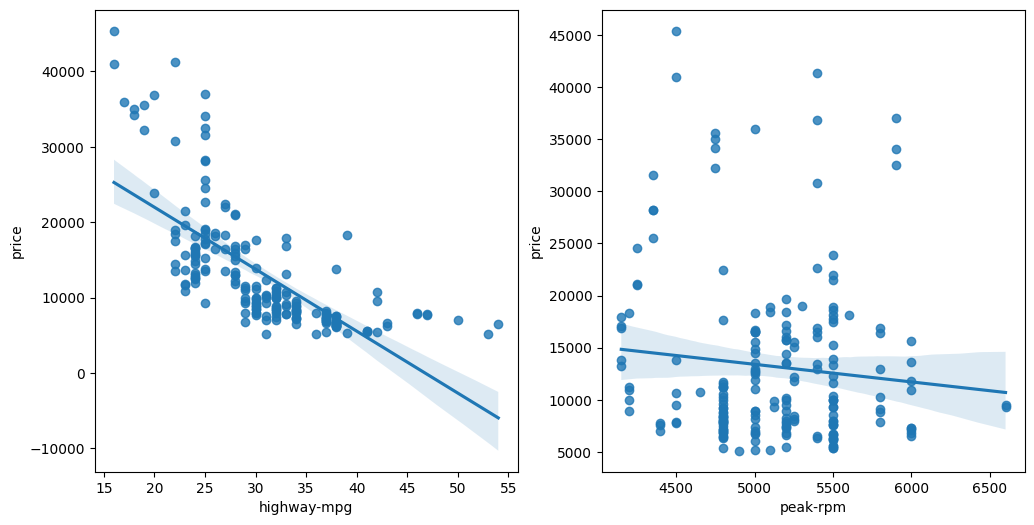

In [276]:
fig, axes = plt.subplots(nrows=1, ncols= 2,figsize=(12,6))
sns.regplot(x=df['highway-mpg'], y= df['price'], ax= axes[0] )
sns.regplot(x= df['peak-rpm'], y = df['price'], ax= axes[1])

We can see in the two plots that the 'highway-mpg' fits better than 'peak-rpm'. The points for 'peak-rpm' have more spread around the predicted line.

### Distribution Plot
For multiple linear regression

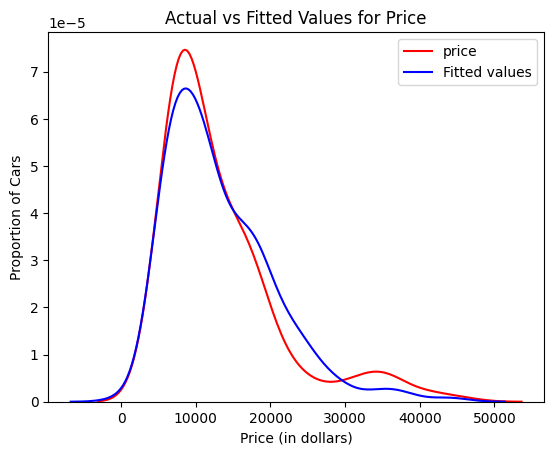

In [277]:
ax1 = sns.kdeplot(df['price'], color='r', label = 'price')
sns.kdeplot(yhat_multi, color='b', label = 'Fitted values', ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

## Residual Plot

<Axes: ylabel='price'>

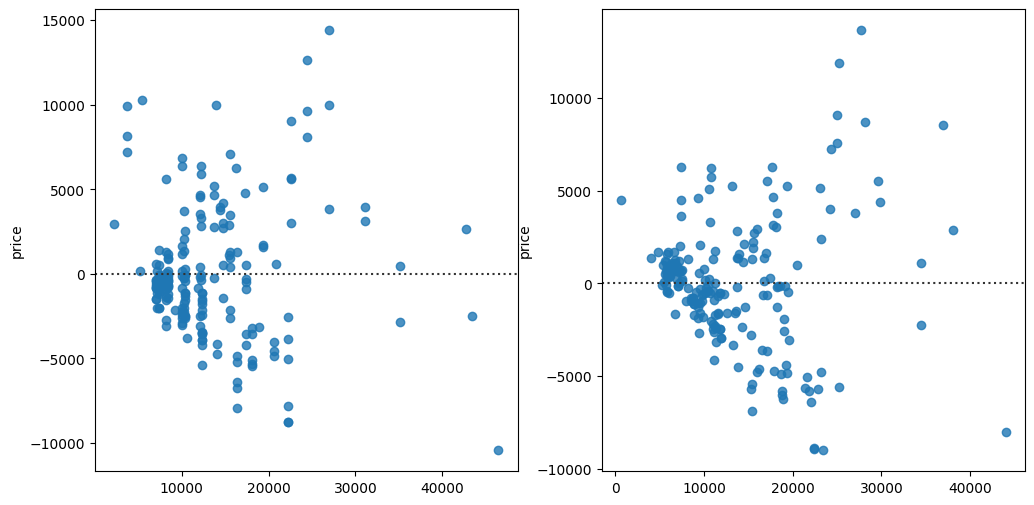

In [278]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
sns.residplot(x = yhat, y = df['price'], ax= axes[0])
sns.residplot(x = yhat_multi, y= df['price'], ax= axes[1])

What we are looking for in the residual plot is to see a random spread around 0. In these cases there are not randomly spread, leading us to believe that maybe a non-linear model is more appropriate for this data. 

# Polynomial Regression and Pipelines

Let´s see 'highway-mpg' with a polynomial regression, with the previous regression had a r2 score of ~0.497.

In [279]:
x = df['highway-mpg']
y = df['price']

f = np.polyfit(x,y,3)
p = np.poly1d(f)

yhat_poly = p(x)

In [280]:
r2_score(y,yhat_poly)

0.674194666390652

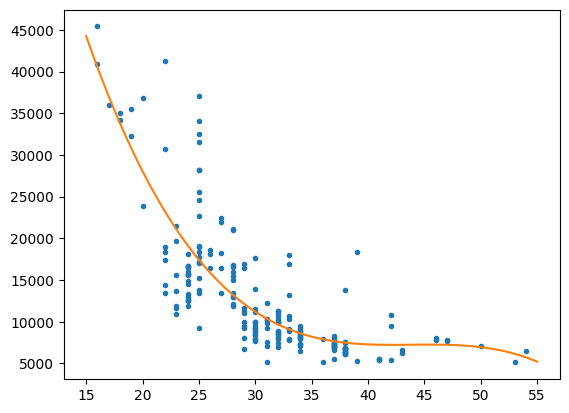

In [281]:
plt.plot(x,y,'.')
x_line = np.linspace(15,55,100)
y_line = p(x_line)
plt.plot(x_line,y_line,'-')


### Multiple polynomial regression

We can perfom a polynomial transform on multiple features:

In [282]:
from sklearn.preprocessing import PolynomialFeatures

In [283]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [284]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
X_pr = pr.fit_transform(X)

We can see that now instead of 4 features, in X_pr we have 15 that are the 4 original terms, 4 squared terms and 6 interaction terms (cross-products), plus an optional bias term, which would be a constant term

Then we can use the linear regression with these new features:

In [285]:
lm_multi_poly = LinearRegression()
lm_multi_poly.fit(X_pr,y)

yhat_multi_poly = lm_multi_poly.predict(X_pr)

r2_score(y,yhat_multi_poly)

0.8463341969864726

## Pipelines

In [286]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

It is a good practice to standarize the data into Z score values for machine learning models

In [287]:
Input = [('scale', StandardScaler()),('polynomial',PolynomialFeatures(degree=2)), ('model',LinearRegression())]

pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [288]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

pipe.fit(X,y)

ypipe = pipe.predict(X)

In [289]:
r2_score(ypipe,yhat_multi_poly)

1.0

We made a pipeline that makes the same result as the previous multiple polynomial regression

# Measures for In-sample Evaluation

We can evaluate with R2 score between the outputs and the original target using r2_score as we have been doing or use the MSE.

We can use indistinctly r2_score and the score method:

In [290]:
print(r2_score(y, pipe.predict(X)))
print(pipe.score(X, y))


0.8463341969864728
0.8463341969864728


# Model Evaluation and Refinement

## Training and Testing

In [293]:
y = df['price']
X = df._get_numeric_data().drop(['price'], axis = 1)
X.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122.0,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,111.0,5000.0,21,27,11.190476,8.703704,False,True,True,False
1,3,122.0,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,111.0,5000.0,21,27,11.190476,8.703704,False,True,True,False
2,1,122.0,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,...,154.0,5000.0,19,26,12.368421,9.038462,False,True,True,False
3,2,164.0,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,...,102.0,5500.0,24,30,9.791667,7.833333,False,True,True,False
4,2,164.0,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,...,115.0,5500.0,18,22,13.055556,10.681818,False,True,True,False


In [294]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.40, random_state = 0)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 81
number of training samples: 120


In [334]:
lm = LinearRegression()

lm.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [296]:
print(lm.score(x_train[['horsepower']], y_train))
print(lm.score(x_test[['horsepower']], y_test))

0.5754067463583004
0.7139364665406973


### Cross-Validation Score

Sometimes you dont have sufficient testing data; as a result, you want to perform cross_validation. 

**Cross_val_score** evaluates the performance of a model by cross-validation, dividing the data into multiple folds and averaging the results. This helps to estimate the generalisability of the model and to avoid overfitting.
Let's see what happend if instead of 40% of testing data, we have 10%:

In [297]:
x_train, x_test, y_train, y_test =  train_test_split(X,y, test_size=0.10, random_state=1)

lm_ex = LinearRegression()

lm_ex.fit(x_train[['horsepower']], y_train)

print(lm_ex.score(x_train[['horsepower']], y_train))
print(lm_ex.score(x_test[['horsepower']], y_test))

0.6619724197515104
0.36358755750788263


Getting back with the previous linear regression model. Let's import cross_val_score from the module model_selection

In [298]:
from sklearn.model_selection import cross_val_score

Rcross = cross_val_score(lm, X[['horsepower']], y,cv=4, scoring= 'r2')
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [299]:
print(Rcross.mean())
print(Rcross.std())

0.522009915042119
0.2911839444756029


#### Cross_val_predict
Instead of having the r2 score for each fold, we can have the values (yhat)

In [300]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lm, X[['horsepower']], y)
yhat.shape

(201,)

## Overfitting, Underfitting and Model Selection

In [335]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.40, random_state = 0)

lm = LinearRegression()
lm.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

yhat_train = lm.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test = lm.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

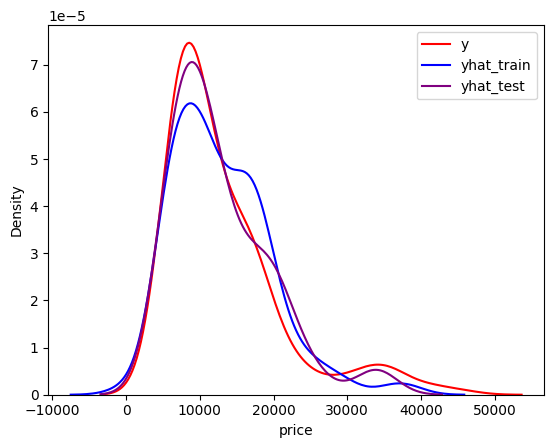

In [302]:
ax1 = sns.kdeplot(y,color='r', label = 'y')
ax2 = sns.kdeplot(yhat_train, color= 'b', label = 'yhat_train', ax= ax1)

sns.kdeplot(yhat_test, color = 'purple',label = 'yhat_test', ax= ax2)

plt.legend()

#### Overfitting

Let's make a polynomial regression of 2 order with the same dataset as the previous linear regression.

In [328]:
pr = PolynomialFeatures(degree=4)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

poly = LinearRegression()
poly.fit(x_train_pr,y_train)

yhat_train_poly = poly.predict(x_train_pr)
yhat_test_poly = poly.predict(x_test_pr)

Let's see the comparison between the results of polynomial and linear regression

(0.0, 50000.0)

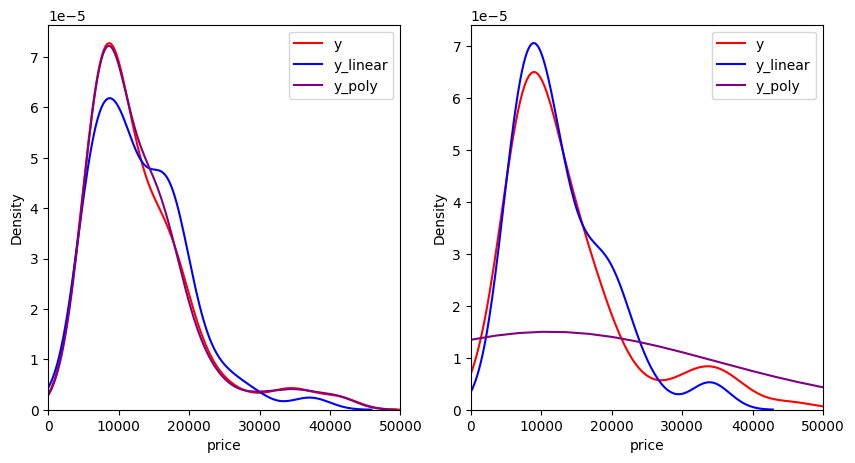

In [329]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,5))

sns.kdeplot(y_train, color= 'red', label = 'y', ax = axes[0])
sns.kdeplot(yhat_train, color= 'blue', label = 'y_linear', ax = axes[0])
sns.kdeplot(yhat_train_poly, color= 'purple', label = 'y_poly', ax = axes[0])

sns.kdeplot(y_test, color= 'red', label = 'y', ax = axes[1])
sns.kdeplot(yhat_test, color= 'blue', label = 'y_linear', ax = axes[1])
sns.kdeplot(yhat_test_poly, color= 'purple', label = 'y_poly', ax = axes[1])

axes[0].legend()
axes[1].legend()

axes[0].set_xlim((0,50000))
axes[1].set_xlim((0,50000))


We can see how good the polynomial model aproaches in the training but in the testing it does not get any close. Was a good fitting for the training but not for the testing

Text(0.5, 1.0, 'R^2 Using Test Data')

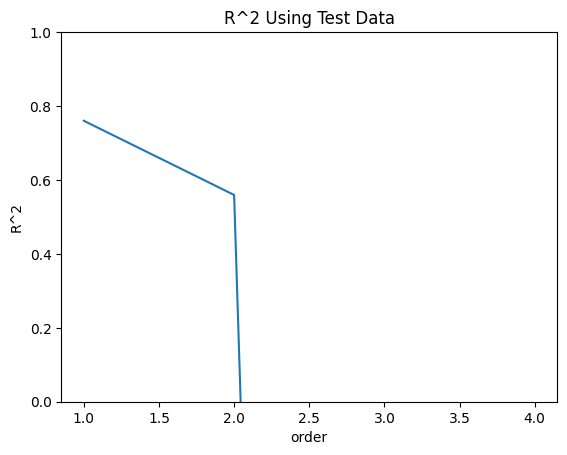

In [339]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])    
    
    poly.fit(x_train_pr, y_train)
    
    Rsqu_test.append(poly.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.ylim((0,1))
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')


### Ridge Regression

Let's perform a 2 degree polynomial

In [340]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Alpha is a hyperparameter which determine the scale of values in the ecuacion model. As bigger is Alpha the smaller the values model.

In [341]:
from sklearn.linear_model import Ridge

RidgeModel = Ridge(alpha=1)

RidgeModel.fit(x_train_pr,y_train)

yhat_ridge = RidgeModel.predict(x_test_pr)

In [343]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:04<00:00, 216.82it/s, Test Score=0.522, Train Score=0.87]


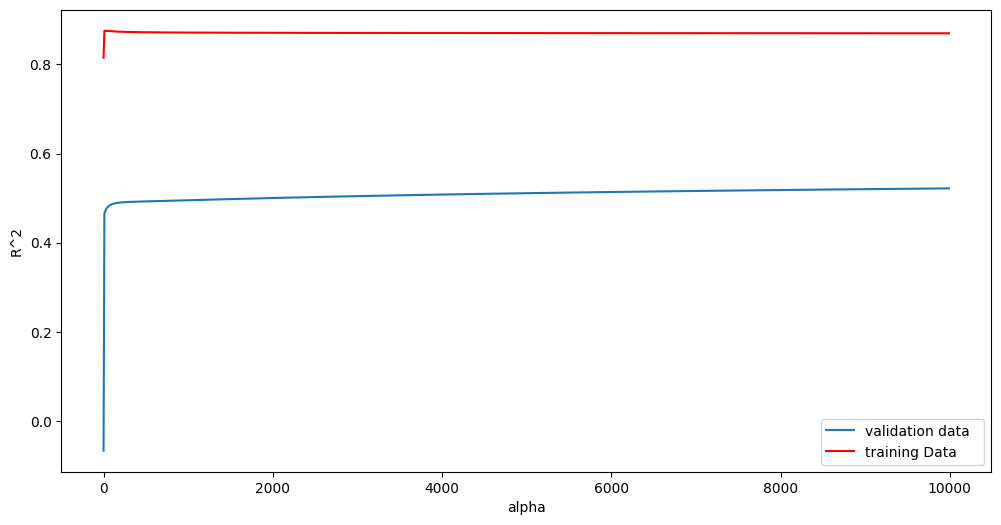

In [345]:
width = 12
height = 6
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

We can search the best alpha simpler with **GridSearchCV**

In [347]:
from sklearn.model_selection import GridSearchCV

parameters1 = [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 1000000]}]
RR = Ridge()

Grid = GridSearchCV(RR, parameters1, cv= 4)

Grid.fit(x_train_pr,y_train)

C:\Users\Arkon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.30001e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Arkon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.16006e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Arkon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.15651e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Arkon\AppD

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

In [348]:
RRbest = Grid.best_estimator_
RRbest

Ridge(alpha=1000000)

In [349]:
RRbest.score(x_test_pr,y_test)

0.6146165039903226

: 